# Visualizing Earnings Based On College Majors

## Introduction

In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors), where we can find also the description of the dataset columns.

The aim of this project is to explore the dataset by means of various kinds of visualizations and to find relations (or their absence) between different columns.
## Data Downloading 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Run the Jupyter magic for plots to be displayed inline
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')

## Initial Data Exploration and Cleaning

In [4]:
# Finding the top-ranked major
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

The top-ranked major is "Petroleum Engineering". Let's take a look at the top5 majors and then at the bottom5 ones.

In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


It seems that "Library Science" is the most risky choice for students in terms of job outcomes.

In [7]:
# Generating summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


A few columns contain missing values that have to be dropped.

In [8]:
# Defining current number of rows
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [9]:
# Dropping missing values
recent_grads = recent_grads.dropna()

In [10]:
# Defining number of rows after droping missing values
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

We checked that only 1 row had missing values, and it was dropped from the dataset.

Now let's use different data visualizations to answer some speific questions about the dataset. 
## Data Visualizations with Scatter Plots
### - Do students in more popular majors make more money?

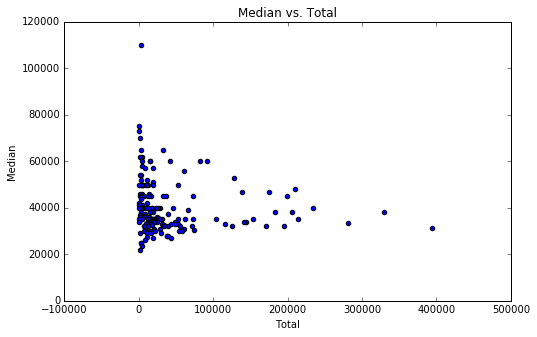

In [11]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Median vs. Total', figsize=(8,5))

At first glance, from this plot it seems that there is no particular relation between total number of people with major and median salaries. One evident thing here is that the data of the `'Total'` column is strongly right-skewed. Close to smaller values of the `'Total'` axis there's a huge variance of median salaries, which rapidly decreases (as well as the number of points) with increasing `'Total'`. Let's take a look at those smaller values of `'Total'`, probably we can discover there some patterns.

(0, 50000)

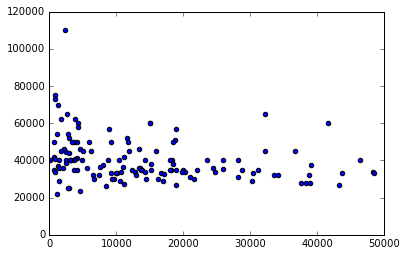

In [12]:
# Stretching the plot along the x-axis between 0 and 50,000
fig, ax = plt.subplots()
ax.scatter(recent_grads['Total'], recent_grads['Median'])
ax.set_xlim(0, 50000)

(0, 10000)

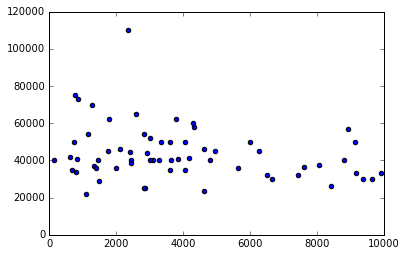

In [13]:
# Stretching the plot even more, between 0 and 10,000
fig, ax = plt.subplots()
ax.scatter(recent_grads['Total'], recent_grads['Median'])
ax.set_xlim(0, 10000)

Our experiments with stretching the plot along the x-axis (i.e. looking at narrower rages of total number of people with a certain major) suggest that the variance of median salaries for smaller values of `'Total'` is more prominent, including minimum and maximum values of median salaries. And the smaller the number of people the bigger the variance. There are some  reasonings for it. Some majors attract few students exactly because of their low popularity at market (like the above-mentioned "Library Science"). Obviously, the salaries for such jobs will be low. On the other hand, some other majors are not a common choice because they are difficult to learn and have more strict acceptance requirements and prerequisits. As a result, these niches heavily lack specialists, which results in high salaries. With increasing of `'Total'`, we observe some local "splashes" of median salaries (most probably, for majors valuable at the modern market and at the same time relatively easy to learn); however, the general tendency is decreasing median salaries. It seems logical: the more people with the same profession the lower the median salaries.


### - Do students that majored in predominantly female  subjects make more money?

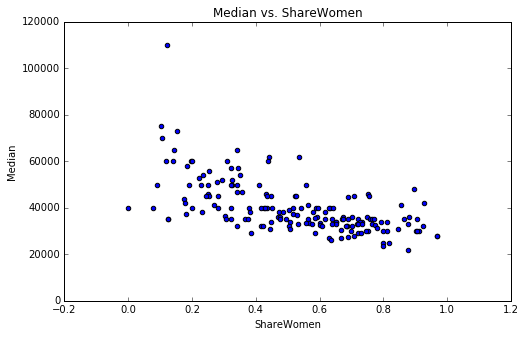

In [14]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median vs. ShareWomen', figsize=(8,5))

Here we see a weak negative correlation: students that majored in mostly female subjects make less money. 
### - Is there any link between the number of full-time employees and median salary?

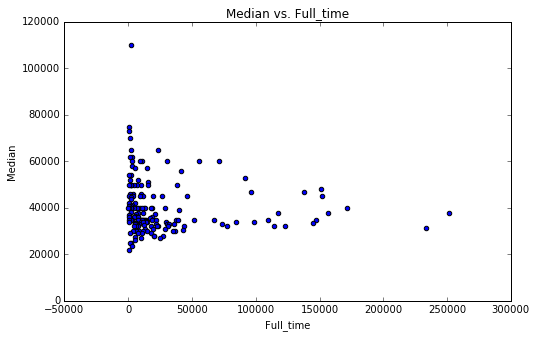

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs. Full_time', figsize=(8,5))

This graph is identical to the 1st one: seemingly no relation between these 2 parameters, strongly right-skewed `'Full_time'` data. Once again, let's try to stretch small values of full-time workers numbers along the x-axis and observe them in more detail.

(0, 50000)

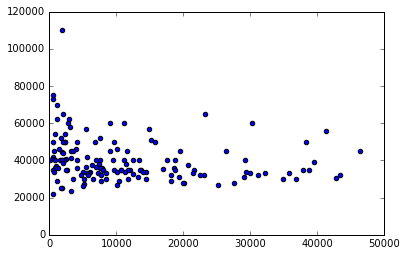

In [16]:
# Stretching the plot along the x-axis between 0 and 50,000
fig, ax = plt.subplots()
ax.scatter(recent_grads['Full_time'], recent_grads['Median'])
ax.set_xlim(0, 50000)

(0, 10000)

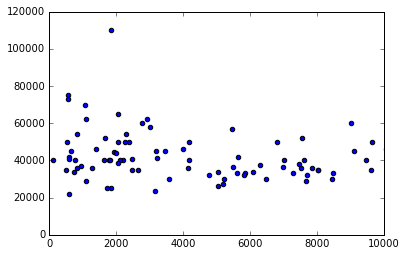

In [17]:
# Stretching the plot even more, between 0 and 10,000
fig, ax = plt.subplots()
ax.scatter(recent_grads['Full_time'], recent_grads['Median'])
ax.set_xlim(0, 10000)

Also in this case it looks like the variance of median salaries for smaller values of `'Full_time'` is larger. Here this tendency can be explained by the nature of mostly full-time and mostly part-time jobs. The last ones tend to be project-centered jobs, with a signficant amount of temporary employees (sub-contract workers, freelancers, experts, consultants, designers etc.). The level of personal responsibility of such employees tends to be higher than that of full-time, and their salary can depend on the final results of their activity, with intrinsic risks and uncertainties. That's why here we have a larger range of median salaries, including minimum and maximum values.
## Data Visualizations with Histograms
Now let's use histograms to visually estimate the distribution of different columns.
### Total Number of People per Major

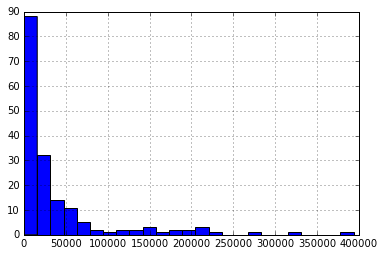

In [18]:
recent_grads['Total'].hist(bins=25)

As we saw also earlier, the data of the `'Total'` column is strongly right-skewed, with only around 5% of all the values greater than 100,000. Let's for now ignore those values and take a closer look at the other 95%.

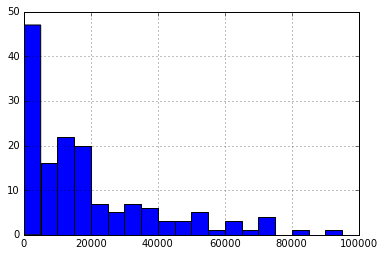

In [19]:
recent_grads['Total'].hist(bins=20, range=(0,100000))

We can notice that:
- around 60% of all the values fall in the 0 to 20,000 range,
- around 25% - in the 0 to 5000 range.

### Median Salaries

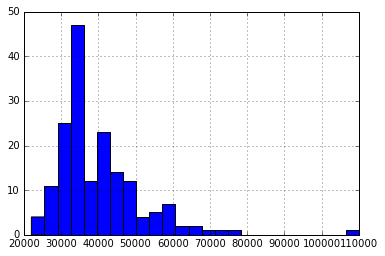

In [20]:
recent_grads['Median'].hist(bins=25)

In this column there is an evident outlier of 110,000 which we have already seen on a scatter plot before. We want to look at the plot without it.

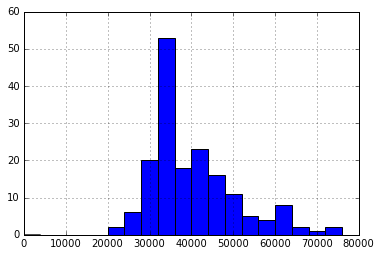

In [21]:
recent_grads['Median'].hist(bins=20, range=(0, 80000))

Now we see also the minimum outlier, less than 5000. Let's ignore it as well.

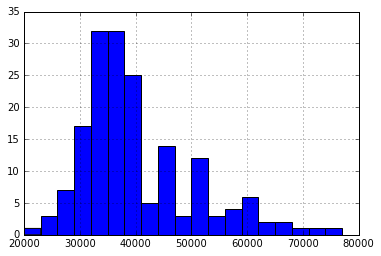

In [22]:
recent_grads['Median'].hist(bins=20, range=(20000, 80000))

From this plot we can conclude that around 60% of median salaries of full-time, year-round workers per major fall in the range of 30,000-40,000$ per year.
### Employed vs. Unemployed, Unemployment Rate

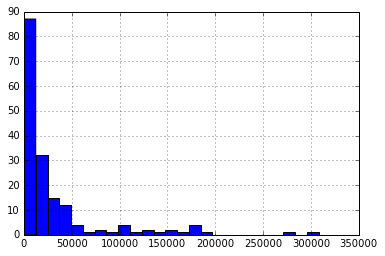

In [23]:
recent_grads['Employed'].hist(bins=25)

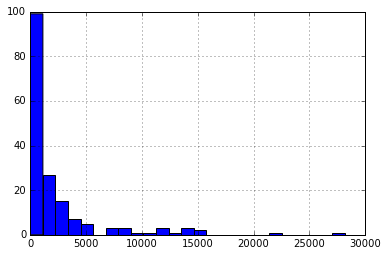

In [24]:
recent_grads['Unemployed'].hist(bins=25)

First, we'll hide the outliers for both `'Employed'` and `'Unemployed'` columns. Since these columns have very different ranges in general, there is no practical point to compare them in the same range.

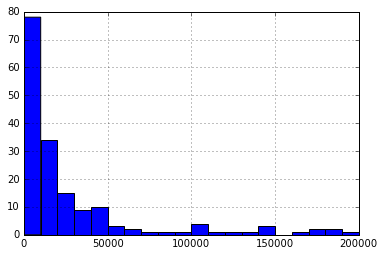

In [25]:
recent_grads['Employed'].hist(bins=20, range=(0, 200000))

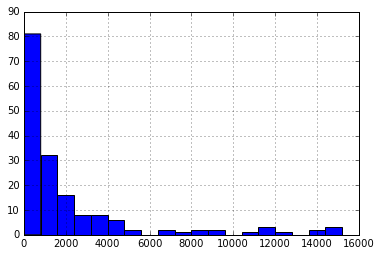

In [26]:
recent_grads['Unemployed'].hist(bins=20, range=(0, 16000))

Even after hiding the outliers, the data in both cases is still heavily right-skewed, and in both cases the "tails" consist of at maximum 5% of values. So let's hide also the tails.

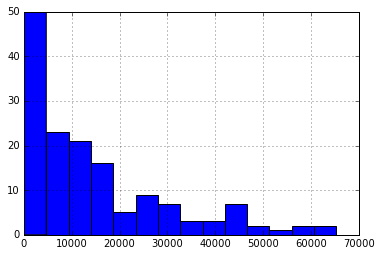

In [27]:
recent_grads['Employed'].hist(bins=15, range=(0, 70000))

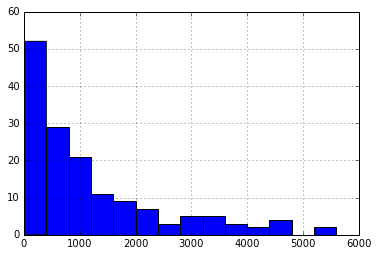

In [28]:
recent_grads['Unemployed'].hist(bins=15, range=(0, 6000))

The `'Employed'` column: 

- around 70% of all the employed people per major fall in the range of 0-20,000,
- around 30% - in the range of 0-5000.

The `'Unemployed'` column:

- around 60% of all the unemployed people per major fall in the range of 0-1000,
- around 30% - in the range of 0-500.

From these results we can roughly estimate that the unemployment rate for all the majors isn't high, but let's have a look at the corresponding column `'Unemployment_rate'`. 

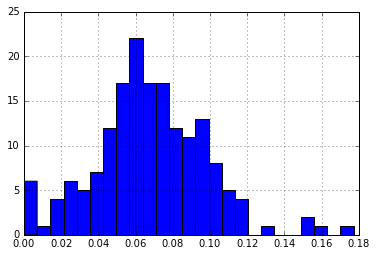

In [29]:
recent_grads['Unemployment_rate'].hist(bins=25)

Now we can confirm that the unemployment rate for all the majors is quite low, with around 60% of values falling in the range of 0.05-0.1 and with the maximum value around 0.18.
### Full-time vs. Part-time

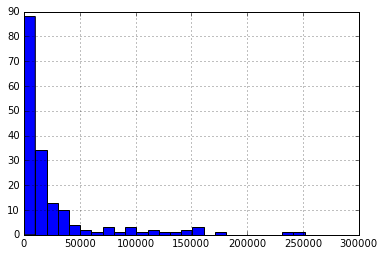

In [30]:
recent_grads['Full_time'].hist(bins=25)

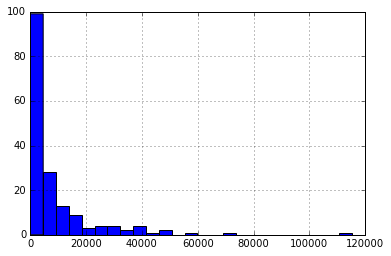

In [31]:
recent_grads['Part_time'].hist(bins=25)

As in the previous case, both plots show strongly right-skewed data, with the tail parts, includig outliers, at maximum up to 5% of all the values. So let's hide these tails.

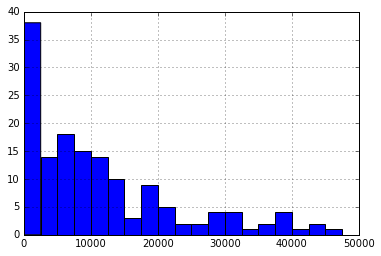

In [32]:
recent_grads['Full_time'].hist(bins=20, range=(0, 50000))

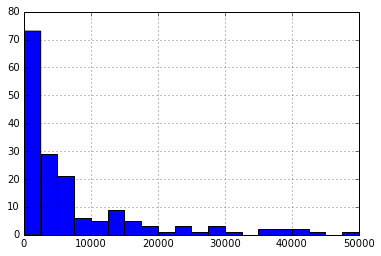

In [33]:
recent_grads['Part_time'].hist(bins=20, range=(0, 50000))

The `'Full_time'` column:

- around 80% of all the full-time workers per major fall in the range of 0-12,000,
- around 40% - in the range of 0-2500.

The `'Part-time'` column:

- around 80% of all the part-time workers per major fall in the range of 0-7500,
- around 40% - in the range of 0-2500.

### Men vs. Women, Sharewomen

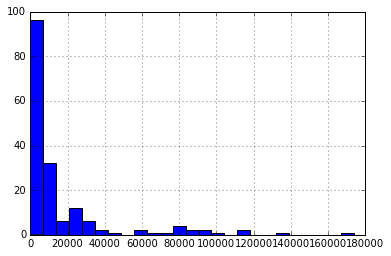

In [34]:
recent_grads['Men'].hist(bins=25)

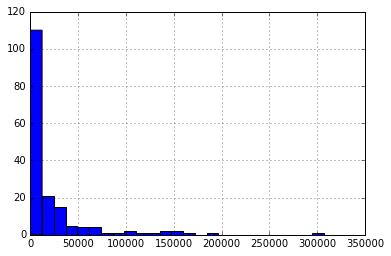

In [35]:
recent_grads['Women'].hist(bins=25)

Just as before, we'll start  by hiding tails and outliers of the plots.

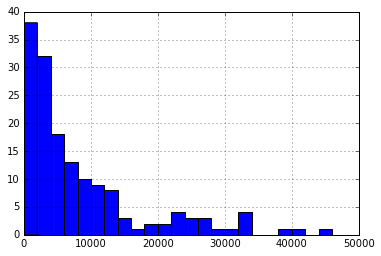

In [36]:
recent_grads['Men'].hist(bins=25, range=(0,50000))

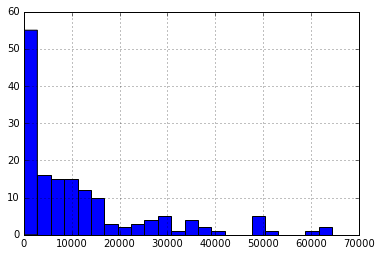

In [37]:
recent_grads['Women'].hist(bins=25, range=(0,70000))

Here we can make the same observation as before: even after hiding tails the data is still heavily right-skewed. 

The `'Men'` column:

- around 90% of all the men per major fall in the range of 0-14,000,
- around 60% - in the range of 0-4000.

The `'Women'` column:

- around 80% of all the women per major fall in the range of 0-18,000,
- around 40% - in the range of 0-2500.

From these results it seems that the sharewomen rate (women as share of total) in general should be high enough. Let's check the corresponding column `'ShareWomen'`.

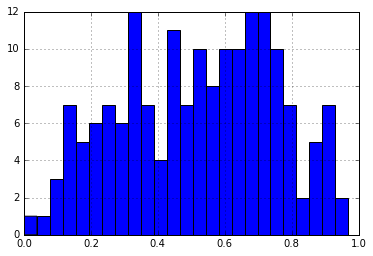

In [38]:
recent_grads['ShareWomen'].hist(bins=25)

We can confirm that:

- around 60% of all the sharewomen rates fall in the range of 0.5-1,
- around 30% - in the range of 0.6-0.8.

## Data Visualizations with Scatter Matrix Plots
A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relations and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Let's import a function that generates such plots, create some matrix plots and analyze them.

In [39]:
from pandas.plotting import scatter_matrix

### Sample Size vs. Median Salary

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378daf6a90>,
      dtype=object)

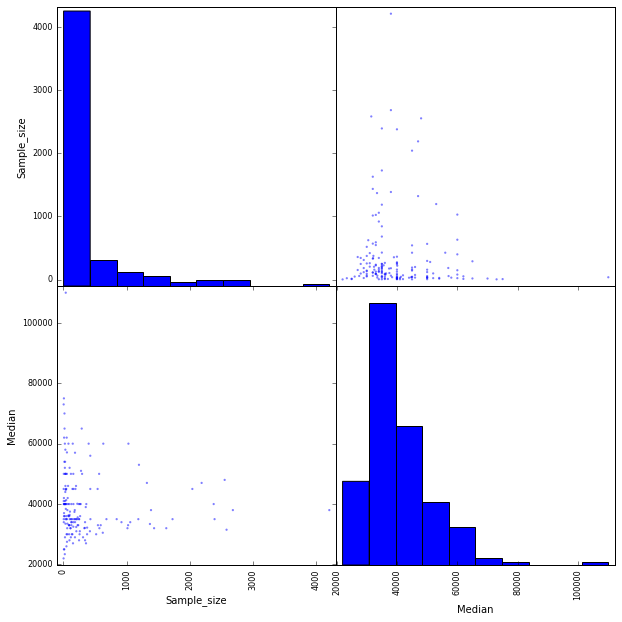

In [40]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 10))

Having only this scatter matrix plot, we can make the following observations.

- Both `'Sample_size'` and `'Median'` columns are right-skewed, especially the first one.
- Both columns contain outliers.
- The variance of `'Median'` is much larger for smaller values of `'Sample_size'`, including also minimum and maximum values.
- With increasing `'Sample_size'`, `'Median'` in general tends to decrease.
- At given scale of both scatter plots and histograms, no particular correlation can be traced between these two columns. Probably (and we already know from the previous analysis that  it's true) changing limits of the axes, we can identify some patterns.

### Sample Size vs. Median Salary vs. Unemployment Rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378d997cf8>,
      dtype=object)

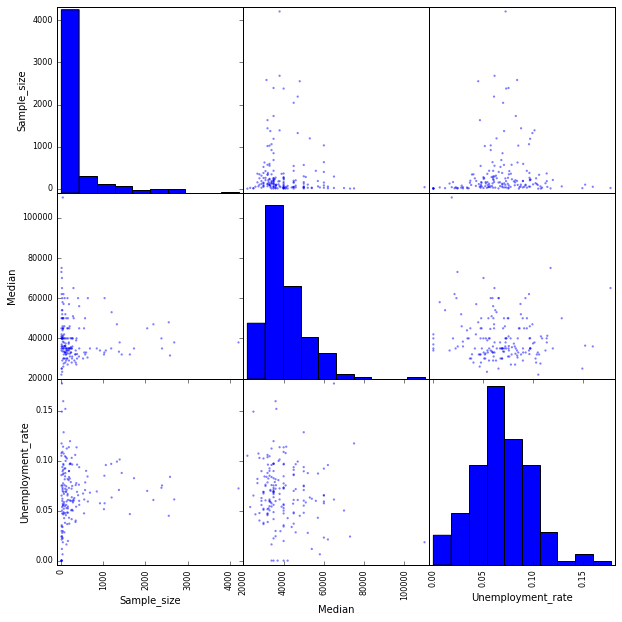

In [41]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10, 10))

All the observations we made for `'Sample_size'` and `'Median'` are valid here. Below are some new insights. 

- The `'Unemployment_rate'` distribution is normal, almost bell-shaped, no outliers.
- No correlation between `'Unemployment_rate'` and `'Median'`.
- The variance of `'Unemployment_rate'` is much larger for smaller values of `'Sample_size'`, including also minimum and maximum values.
- With increasing `'Sample_size'`, `'Unemployment_rate'` tends to reach the average value.
- At given scale of both scatter plots and histograms, no particular correlation can be traced between `'Sample_size'` and `'Unemployment_rate'`. Probably changing limits of the axes, we can identify some patterns.

### Sharewomen vs. Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378d600b38>,
      dtype=object)

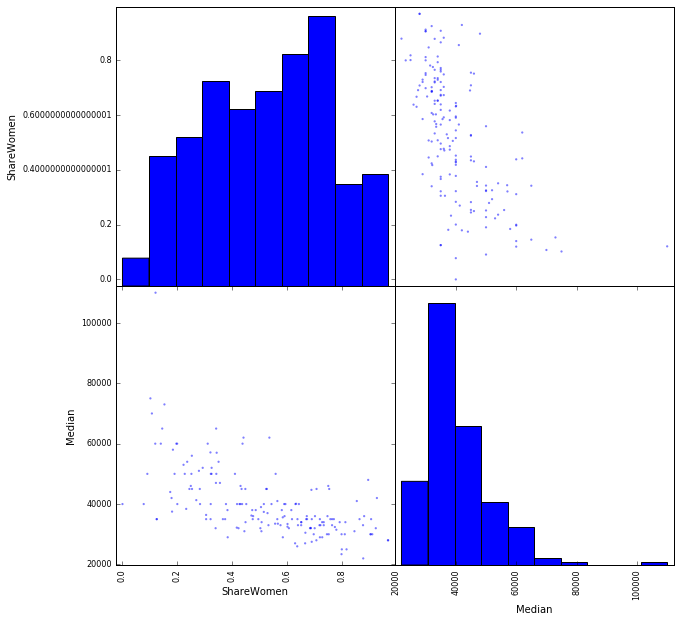

In [42]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10, 10))

- A right-skewed distribution with outliers for `'Median'` and a left-skewed for `'ShareWomen'`.
- A weak negative correlation between these columns (as we saw also before).
- Larger variance of `'Median'` for smaller values of `'ShareWomen'`.

### Employed vs. Unemployed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378d47bf28>,
      dtype=object)

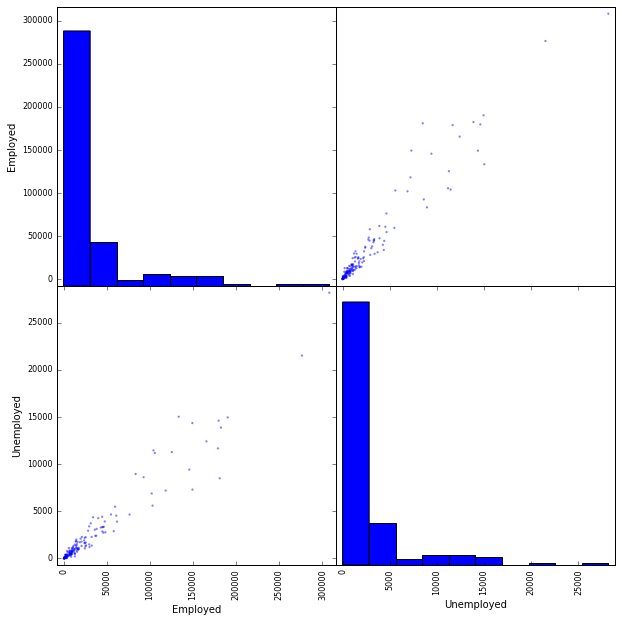

In [43]:
scatter_matrix(recent_grads[['Employed', 'Unemployed']], figsize=(10, 10))

- Both columns are strongly right-skewed.
- Both columns contain outliers.
- A positive correlation between these tho columns. Probably both of them depend more on total number of people per major.

## Data Visualizations with Bar Plots
### Sharewomen Top10 vs. Bottom10
Let's compare `'ShareWomen'` values from the first ten rows and last ten rows of the dataframe.

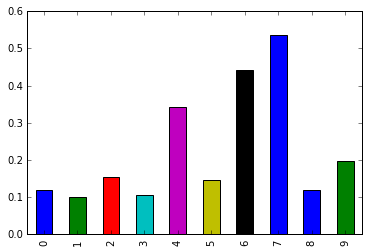

In [44]:
# Plotting the 'ShareWomen' values from the first ten rows of the dataframe
recent_grads[:10]['ShareWomen'].plot(kind='bar')

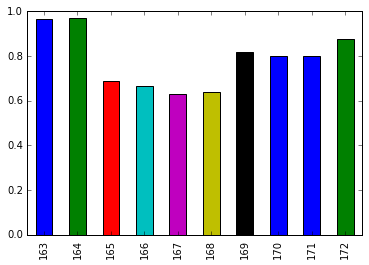

In [45]:
# Plotting the 'ShareWomen' values from the last ten rows of the dataframe
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

The most noticeable thing here is high values of the `'ShareWomen'` column from the last 10 rows: all greater than 0.6, with 60% of values greater or equal to 0.8 and 20% close to 1. 

The first 10 rows have much smaller values: from 0.1 to 0.55, with 70% of values smaller than 0.2.
### Unemployment Rate Top10 vs. Bottom10

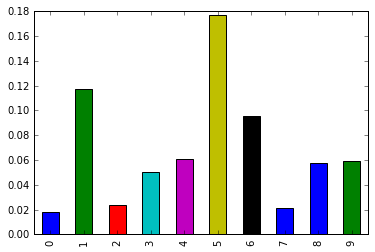

In [46]:
# Plotting the 'Unemployment_rate' values from the first ten rows of the dataframe
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

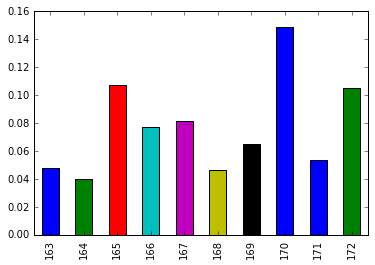

In [47]:
# Plotting the 'Unemployment_rate' values from the last ten rows of the dataframe
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

The `'Unemployment_rate'` from the first ten rows ranges from 0.02 to 0.18, with 30% of values smaller or equal to 0.03 and 90% - smaller or equal to 0.12.

The last ten rows show in general higher values of the unemploymet rate. The values range from 0.04 to 0.15.
### Men vs. Women by Major Category

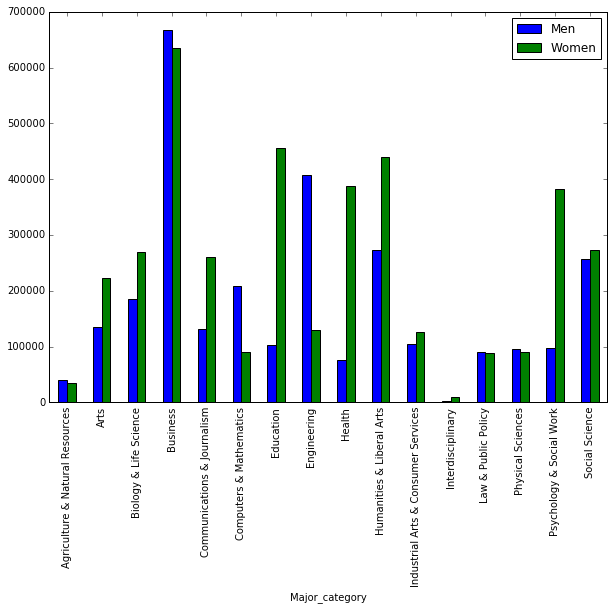

In [48]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(10, 7))

- The most popular category for both men and women is `'Business'`, the least - `'Interdisciplinary'`, followed by `'Agriculture & Natural Resources'`.
-  The category with almost equal numbers of men and women is `'Law & 'Public Policy'`, followed by `'Physical Sciences'` and `'Agriculture & Natural Resources'`.
- The most female category is `'Education'`, followed by `'Health'` and `'Psychology & Social Work'`.
- The most male category is `'Engineering'`, followed by `'Computers & Mathematics'`.

## Data Visualizations with Box Plots
### Median Salaries

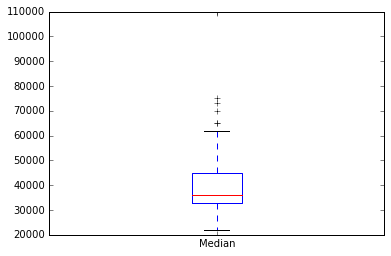

In [49]:
recent_grads['Median'].plot(kind='box')

- The bottom 25% of median salaries range from 22,000\$ to 33,000\$.
- The top 25% of median salaries range from 45,000\$ to 62,000\$.
- The median of median salaries is 36,000\$.
- There are several outliers, with the maximum value of 110,000\$.

Apart from the visual representation, we can obtain these values directly.

In [50]:
# Calculating quantiles
recent_grads['Median'].quantile([0.25, 0.5, 0.75])

0.25    33000.0
0.50    36000.0
0.75    45000.0
Name: Median, dtype: float64

Outliers:  [array([110000,  75000,  73000,  70000,  65000,  65000])]
Whiskers:  [array([33000., 22000.]), array([45000., 62000.])]


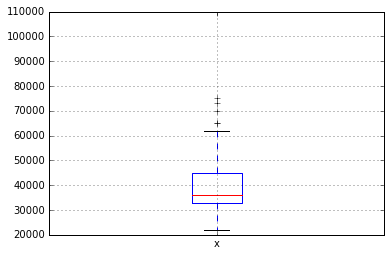

In [51]:
# Calculating outliers and whiskers
_, bp = pd.DataFrame.boxplot(recent_grads['Median'], return_type='both')
print('Outliers: ', [flier.get_ydata() for flier in bp['fliers']])
print('Whiskers: ', [whiskers.get_ydata() for whiskers in bp['whiskers']])

Let's take a look at the majors with those extraordinarily big median salaries (outliers).

In [52]:
recent_grads[['Major', 'Median']][recent_grads['Median'] > 62000]

,Major,Median
0,PETROLEUM ENGINEERING,110000
1,MINING AND MINERAL ENGINEERING,75000
2,METALLURGICAL ENGINEERING,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,CHEMICAL ENGINEERING,65000
5,NUCLEAR ENGINEERING,65000






### Unemployment Rate

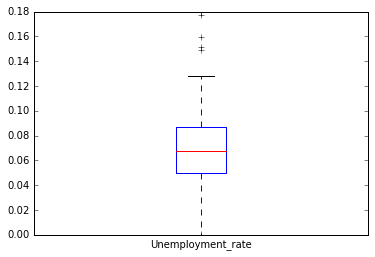

In [53]:
recent_grads['Unemployment_rate'].plot(kind='box')

- The bottom 25% of unemployment rates range from 0 to 0.05.
- The top 25% of unemployment rates range from 0.09 to 0.13.
- The median of unemployment rates is 0.07.
- There are several outliers, with the maximum value of 0.18.

Let's take a look at the majors with anomalously high unemployment rates (outliers).

In [54]:
recent_grads[['Major', 'Unemployment_rate']][recent_grads['Unemployment_rate'] > 0.13]

,Major,Unemployment_rate
5,NUCLEAR ENGINEERING,0.177226
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491
170,CLINICAL PSYCHOLOGY,0.149048


## Data Visualizations with Hexagonal Bin Plots
A hexagonal bin plot is created by covering the data range with a regular array of hexagons and coloring each hexagon according to the number of observations it covers. The hex-binned plots are good for visualizing large datasets for which a scatter plot would suffer from overplotting.

Even though our dataset is not so large, let's create a hex-binned plot for `'Median'` vs. `'ShareWomen'`.

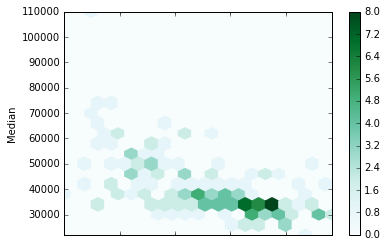

In [55]:
recent_grads.plot.hexbin(x='ShareWomen', y='Median', gridsize=20)

This plot emphasizes areas corresponding to high-density scatter plot areas that we saw earlier.
## Conclusion
To conclude, in this project we have analyzed a dataset on the job outcomes of students with different majors, created visualizations (scatter plots, histograms, scatter matrix plots, bar plots, box plots, hexagonal bin plots) and explored relations between different columns. Here is a summary of our most interesting findings.

- The top-ranked major is "Petroleum Engineering", the bottom-ranked - "Library Science".
- For most of majors the median salaries are in range of 22,000- 62,000\$, with the median of 36,000\$. Very few majors, all from engineering category, show higher values (up to 110,000\$): "Petroleum Engineering", "Mining and Mineral Engineering", "Metallurgical Engineering", "Naval Architecture and Marine Engineering", "Chemical Engineering", "Nuclear Engineering".
- The dispersion of median salaries is much larger for the majors with smaller numbers of people. With the increase of number of people per major this dispersion, as well as median salaries themselves, tends to decrease.
- The majority of majors count up to 100,000 people each.
- For most of majors the unemployment rate is smaller than 0.13, with a general tendency to increase with increasing the rank. Very few majors show higher values (up to 0.18): "Nuclear Energy", "Computer Networking & Telecommunications", "Public Administration", "Clinical Psychology".
- The most popular category for both genders is "Business", the least – "Interdisciplinary" and "Agriculture & Natural Resources".
- The categories with almost equal numbers of each gender are "Law & 'Public Policy", "Physical Sciences" and "Agriculture & Natural Resources".
- The most male categories are "Engineering" and "Computers & Mathematics".
- The most female categories are "Education", "Health", and "Psychology & Social Work".
- Students from mostly female majors make less money.
- The average sharewomen rate is greater than 0.5.
- For the top10 majors, the average sharewomen rate is about 4 times less than that for the bottom10 ones.